# Effects of Gender, Age Groups & Time of Day on duration for Bikerides

## by Sonia Barbosa


## Investigation Overview


For the presentation, I focus on the influence of gender, age groups and part of the day on the length of the trips.
I will start by introducing the length variable. Afterwards, I introduce each of the categorical variables one by one.
To start, I will use the violin and box plots showing the relationship between trip length and gender as this result clearly shows that the female gender take in average longer trips. For the age groups, I want to show the plot matrix informing that when looking at the distribution of length per age group and day of week, the higher age groups take in average longer trips. 
For my last varible, I also want to show that the trips during the morning and afternoon are in average longer than the trips taken in the evening and during the night. 



## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This dataset consists of information regarding 1,834,412 individual rides including 16 variables for a specific time series.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
go_bike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#create a new column in the original dataframe with the day of the week.
#convert the start_time column to datime format
go_bike['start_time'] = pd.to_datetime(go_bike['start_time'])
go_bike['day_of_week'] = go_bike['start_time'].dt.day_name()


In [4]:
# convert day_of_week into ordered categorical types
ordinal_var_dict = {'day_of_week': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    go_bike[var] = go_bike[var].astype(ordered_var)

In [5]:
#create a new column in the original dataframe with the hour of the day
#convert the start_time column in order to get a new column with the hour
go_bike['start_hour'] = go_bike.start_time.dt.strftime("%H")
go_bike['start_hour']=go_bike['start_hour'].astype(int)


In [6]:
#create new bins and labels for the different part of the day
go_bike['part_of_day'] = pd.cut(x=go_bike['start_hour'], bins=[0, 6, 12, 18, 24], labels=['night', 'morning', 'afternoon', 'evening'])


In [7]:
#convert part_of_day into ordered categorical types
ordinal_var_dict_2 = {'part_of_day': ['morning','afternoon','evening','night']}

for var in ordinal_var_dict_2:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict_2[var])
    go_bike[var] = go_bike[var].astype(ordered_var)

## Distribution of length of trips(minutes)

The distribution of minutes in the dataset has a very large range of values from very short trips from 1 minute as shortest to 1424 minutes as the longest. When plotted on a logarithmic scale, we can see most bikerides are under 10 minutes with a peak between 6-10 minutes.


In [8]:
#create a column for minutes of duration instead of seconds to get a better view
go_bike['duration_min'] = go_bike['duration_sec']//60


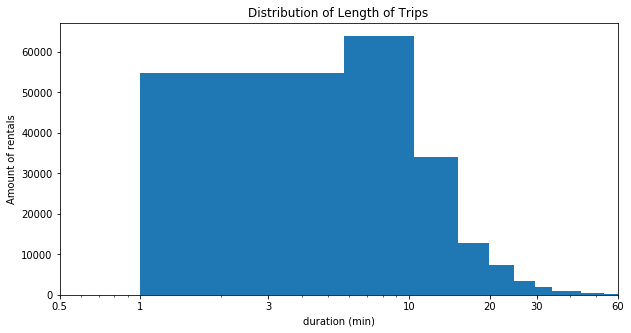

In [9]:

#look at the distribution of length
binsize = 300
bins = np.arange(1, go_bike['duration_min'].max(), binsize)
ticks = [0.5, 1, 3, 10, 20, 30, 60,]
labels = ['{}'.format(val) for val in ticks]

plt.figure(figsize=[10, 5])
plt.hist(data = go_bike, x = 'duration_min', bins= binsize)
plt.xscale('log')
plt.xlim([0,50])
plt.xticks(ticks, labels)
plt.ylabel('Amount of rentals')
plt.xlabel('duration (min)')
plt.title('Distribution of Length of Trips')
plt.show()

## Distribution of Gender 

The data shows that female users have in average longer trips compared to the genders male and other. The average trip length for the female gender is around 8 minutes while for male it is around 7 minutes and other around 8.

In [10]:
#Create function to implement IQR method.
def remove_outlier_IQR(go_bike):
    Q1=go_bike.quantile(0.25)
    Q3=go_bike.quantile(0.75)
    IQR=Q3-Q1
    go_bike_final=go_bike[~((go_bike<(Q1-1.5*IQR)) | (go_bike>(Q3+1.5*IQR)))]
    return go_bike_final

In [11]:
#call cleaning function
go_bike['duration_min_cleaned']=remove_outlier_IQR(go_bike['duration_min'])

In [12]:
#Check that outliers have been removed
go_bike['duration_min_cleaned'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
duration_min_cleaned,174097.0,8.812984,5.224678,1.0,5.0,8.0,12.0,25.0


(-2.5586169451525183, 28.558616945152519)

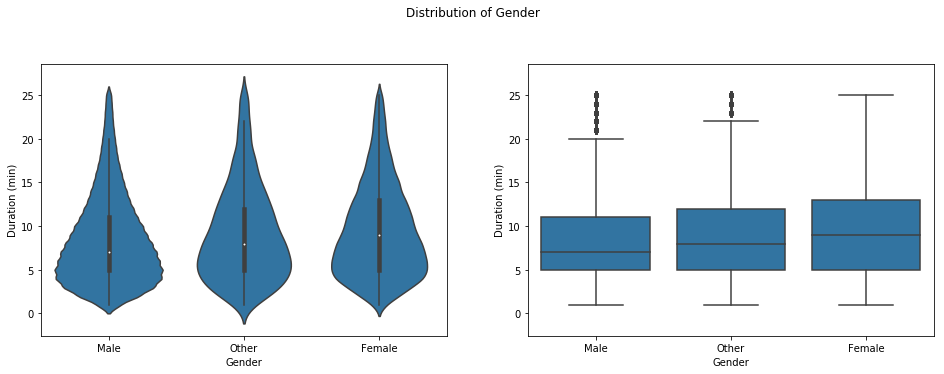

In [13]:
#initial settings for the plots
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]
plt.suptitle("Distribution of Gender", y = 1.04)

# LEFT plot: violin plot with one row, two columns, and the settings for the first subplot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=go_bike, x='member_gender', y='duration_min_cleaned', color=base_color)
plt.ylabel('Duration (min)')
plt.xlabel('Gender');

# RIGHT plot: box plot with one row, two columns and the settings for the second subplot
plt.subplot(1, 2, 2)
sb.boxplot(data=go_bike, x='member_gender', y='duration_min_cleaned', color=base_color)
plt.ylabel('Duration (min)')
plt.xlabel('Gender');
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

## How does the day of week and time of day affect the duration of the trips?
The data shows that although the day of the week does not impact the average length of the trips, when looking at the distribution of parts of the day we can see that the longer trips are taken during the mornings and afternoons where the average duration is around 8 minutes.

In [14]:
#creating the variables to be used in the PairGrid
numeric_var = ['duration_min_cleaned']
cat_var_1 = ['bike_share_for_all_trip', 'age_by_decade']
cat_var_2 = ['day_of_week', 'part_of_day']

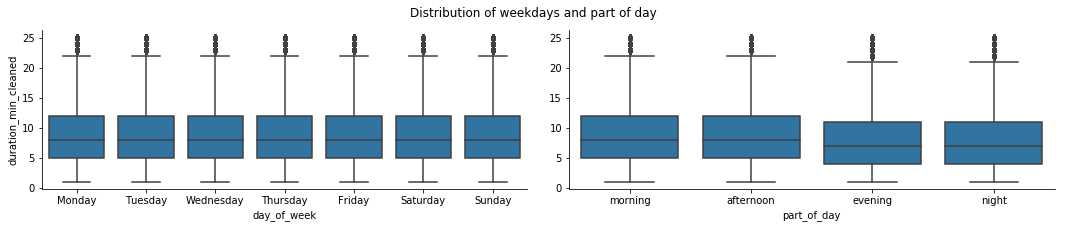

In [15]:
#creating the chart
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.suptitle("Distribution of weekdays and part of day", y = 1.04)


plt.figure(figsize = [30, 20])

g = sb.PairGrid(data = go_bike, y_vars = ['duration_min_cleaned'], x_vars = cat_var_2,
                size = 3, aspect = 2.5)

g.map(boxgrid)
plt.show();

## Distribution per Age Group
When looking at the distribution per age group, the age groups that have the longest trip lengths is the age group 50-70s. They have the longest rides in all days of the week except for Fridays where the younger groups have longer trips and Sundays where they have the same as the younger groups. 

In [16]:
go_bike['Age']= 2022 - go_bike['member_birth_year']

In [17]:
#creating a new column called age_bins.
go_bike['age_bins'] = pd.cut(x=go_bike['Age'], bins=[20, 29, 39, 49,59,69,79,89,100])


In [18]:
#Create New Column of of age_by_decade With Labels 
go_bike['age_by_decade'] = pd.cut(x=go_bike['Age'], bins=[20, 29, 39, 49,59,69,79,89,100], labels=['20s', '30s', '40s','50s','60s','70s','80s','100s'])


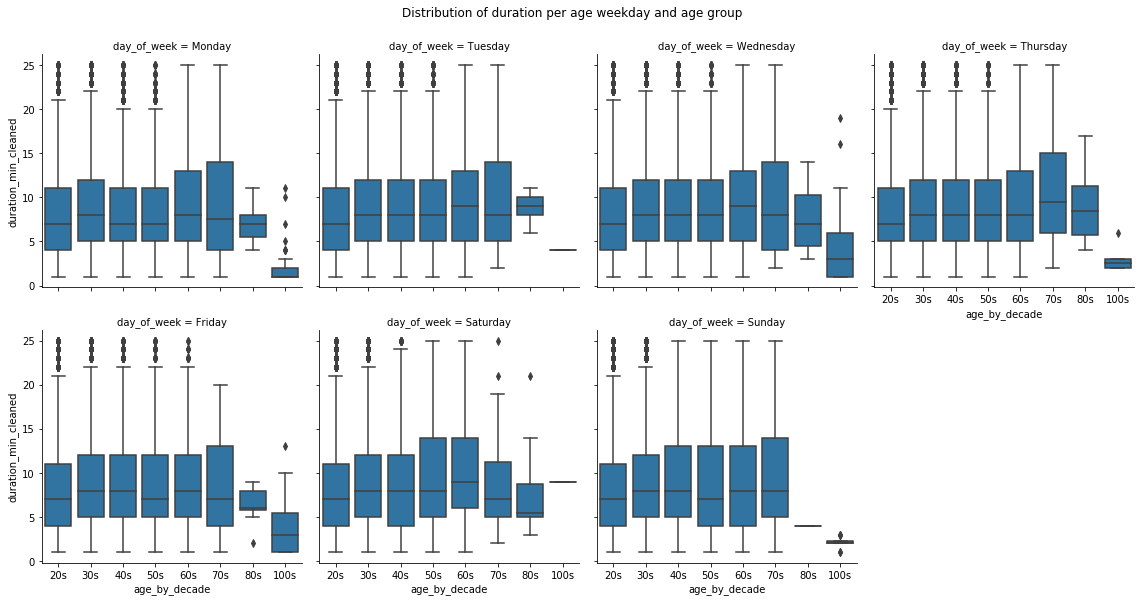

In [19]:
#create a plot matrix

g = sb.FacetGrid(data = go_bike, col = 'day_of_week', col_wrap=4, size = 4)
plt.suptitle("Distribution of duration per age weekday and age group", y = 1.04)
g.map(sb.boxplot, 'age_by_decade', 'duration_min_cleaned');

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 297260 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
